# Import 

In [21]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

# Dataset

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

13568290/13568290 [==============================] - 0s 0us/step


In [4]:
csv_path, _ = os.path.splitext(zip_path)

In [5]:
df = pd.read_csv(csv_path)
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


### We have a dataset with 10min interval from 2009 to 2017 of the temperature

In [6]:
df.shape

(420551, 15)

In [7]:
# after every 5 we have completed 1 hour. 
# for this test purposes we are going to use only the 1 hour mark data

df = df[5::6]
df.head(5) # you can see all the data in 1 hour interval 

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [8]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S') # we taking the date as input
df.head(3)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2


<Axes: xlabel='Date Time'>

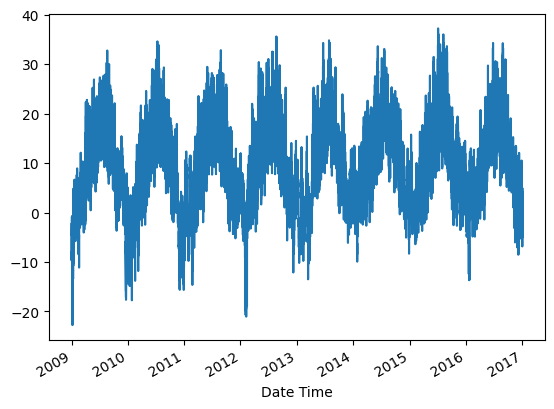

In [9]:
temp = df['T (degC)']
temp.plot() # so as we can see the the temperature goes ups and downs 

### So in this case what we are trying to do is based on 1,2,3,4, 5 (hour)> we are going  to guess what will be the 6th hour temperature 
### again , after that we are going to take 2,3,4,5,6 > to predict the what will be the temperature at 7th hour

In [10]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = [] # previous hours
  y = [] # current hours
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [11]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [12]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

# Model Buildup

In [14]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

In [15]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 18s 7ms/step - loss: 42.3327 - root_mean_squared_error: 6.5064 - val_loss: 1.4616 - val_root_mean_squared_error: 1.2090
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6380 - root_mean_squared_error: 1.6242 - val_loss: 0.6565 - val_root_mean_squared_error: 0.8102
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0180 - root_mean_squared_error: 1.0090 - val_loss: 0.5568 - val_root_mean_squared_error: 0.7462
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7528 - root_mean_squared_error: 0.8677 - val_loss: 0.5157 - val_root_mean_squared_error: 0.7181
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6889 - root_mean_squared_error: 0.8300 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7111
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6679 - root_mean_squared_error: 0.8173 - val_l

In [18]:
model1 = load_model('model1/') # this is best model 

# Ploting  and Prediction

### Train

In [22]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results[1:10]

1875/1875 [==============================] - 4s 2ms/step


,Train Predictions,Actuals
1,-9.740712,-9.17
2,-8.885365,-8.10
3,-7.438094,-7.66
4,-7.323761,-7.04
5,-6.664752,-7.41
6,-7.598178,-6.87
7,-6.593299,-5.89
8,-5.221979,-5.94
9,-5.844609,-5.69


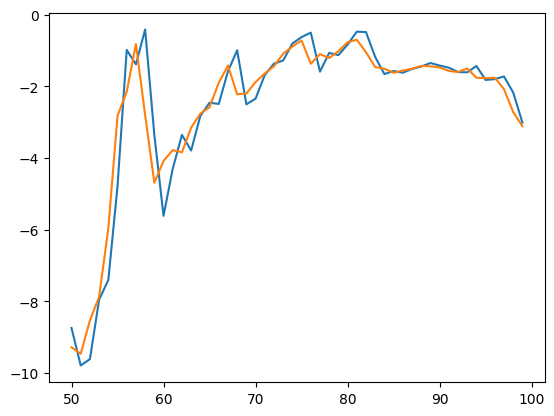

In [26]:
plt.plot(train_results['Train Predictions'][50:100]) # blue 
plt.plot(train_results['Actuals'][50:100]) # orange

### Val

In [27]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,15.476324,14.02
1,13.240122,13.67
2,13.088800,12.27
3,11.543980,11.19
4,10.421203,10.85
...,...,...
4995,17.398735,18.27
4996,17.371214,17.85
4997,17.237371,16.65
4998,15.870938,15.85


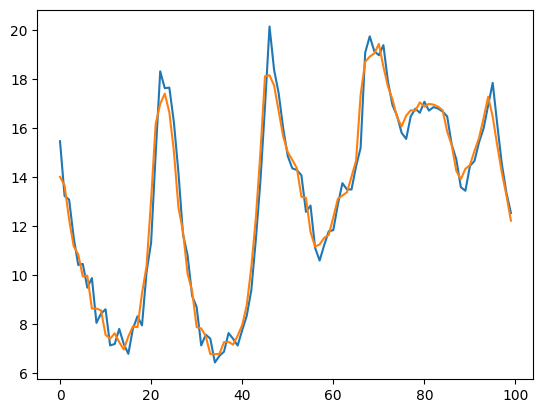

In [28]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

### Test

In [29]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,14.427015,13.99
1,13.270109,13.46
2,12.904439,12.93
3,12.527140,12.43
4,12.078017,12.17
...,...,...
5081,-1.170839,-0.98
5082,-1.387189,-1.40
5083,-1.634193,-2.75
5084,-3.206925,-2.89


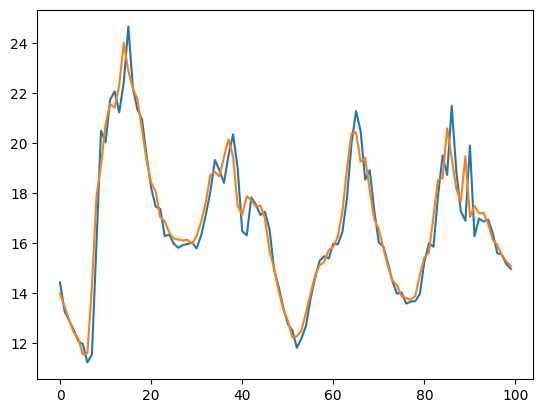

In [30]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])